# Question 1

In [64]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import csv

In [65]:
#Read data from CSV
def read_data(filename):
    x = []
    t = []
    with open(filename) as csvfile:
        data = csv.reader(csvfile)
        
        for year, time in data:
            x.append(float(year))
            t.append(float(time))
    return x, t

x, t = read_data('female200.csv')

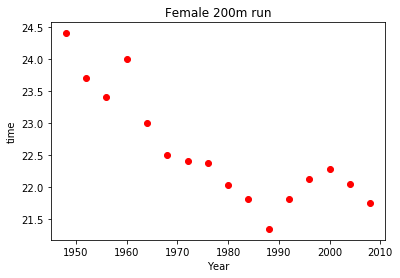

In [66]:
#Plot data to scatter plot
plt.scatter(x, t, color = 'red')
plt.title('Female 200m run')
plt.xlabel('Year')
plt.ylabel('time')
plt.show()

#### By analyzing the above plot, it dosen't apper to be linear. 

# Question 2

In [67]:
# Function to calculate average
def average(array):
    return sum(array) / len(array)

In [68]:
# Calculate average of both years and run_times
x_bar = average(x)
print('x_bar:', x_bar)
t_bar = average(t)
print('t_bar:', t_bar)

x_bar: 1978.0
t_bar: 22.55875


In [69]:
# average of time * year
xt_bar = average([x_i * t_i for x_i, t_i in zip(x, t)])
print('xt_bar:', xt_bar)

# average of time** 
x2_bar = average([x_i ** 2 for x_i in x])
print('x2_bar:', x2_bar)

xt_bar: 44607.84
x2_bar: 3912824.0


In [70]:
# w1_hat is the coefficient of x (slope)
w1_hat = (xt_bar - t_bar*x_bar)/(x2_bar-x_bar*x_bar)
print('w1_hat:', w1_hat)

# w0_hat is the y intercept
w0_hat = t_bar-w1_hat*x_bar
print('w0_hat:', w0_hat)

w1_hat: -0.03931617647058909
w0_hat: 100.32614705882523


In [71]:
#print in y = w0 + w1*x equation
print('y = {} + {}x'.format(w0_hat,w1_hat))

y = 100.32614705882523 + -0.03931617647058909x


Text(0,0.5,'Winning time (s)')

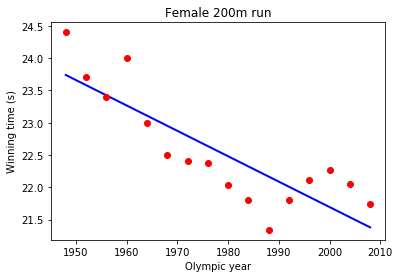

In [72]:
x_test = np.linspace(1948,2008,100)[:,None]
f_test = w0_hat+w1_hat*x_test
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.plot(x,t, 'ro')
plt.title('Female 200m run')
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

In [73]:
#CALCULATING THE LOSS
loss = 0
for time, target_year in zip(x, t):
    y_pred = w0_hat + w1_hat * time
    loss = loss + (target_year - y_pred) **2 
    print(target_year,'\t', y_pred)
    
avg_loss = loss/len(x)
print('\nAverage Loss:', avg_loss)

24.4 	 23.738235294117686
23.7 	 23.58097058823533
23.4 	 23.423705882352962
24.0 	 23.266441176470607
23.0 	 23.109176470588253
22.5 	 22.951911764705898
22.4 	 22.794647058823543
22.37 	 22.637382352941188
22.03 	 22.480117647058833
21.81 	 22.32285294117648
21.34 	 22.165588235294123
21.81 	 22.008323529411754
22.12 	 21.8510588235294
22.27 	 21.693794117647045
22.05 	 21.53652941176469
21.74 	 21.379264705882335

Average Loss: 0.21367694852941305


# Question 3

In [74]:
#Change the scale to fit the value better
x = np.array(x)
x = (x - 1948)/4
print(x)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


In [75]:
#Creating matrix for for 3rd order polynomial
x_vec_3 = np.array(x)

In [76]:
#calculating year with 3rd form polynomial 
maxorder = 3
X__poly_3 = np.ones_like(x_vec_3)
for i in range(1,maxorder+1):
    X__poly_3 = np.column_stack((X__poly_3,np.power(x_vec_3,i)))
print(X__poly_3)

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.100e+01 1.210e+02 1.331e+03]
 [1.000e+00 1.200e+01 1.440e+02 1.728e+03]
 [1.000e+00 1.300e+01 1.690e+02 2.197e+03]
 [1.000e+00 1.400e+01 1.960e+02 2.744e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]


In [77]:
w3 = np.dot(np.linalg.inv(np.dot(X__poly_3.T,X__poly_3)),np.dot(X__poly_3.T,t))
print(w3)

[ 2.43523710e+01 -3.97606497e-01  1.16577927e-02  3.16609775e-04]


In [79]:
#Creating test set 
x_test3 = np.linspace(0,15,x.size)[:,None]
X_test3 = np.ones_like(x_test3)
for i in range(1,maxorder+1):
    X_test3 = np.hstack((X_test3,x_test3**i))
# X_test = np.hstack((X_test,np.sin(x_test)))
f_test3 = np.dot(X_test3,w3)

#Print f_test3
print(f_test3)

[24.352371   23.96673891 23.60632206 23.27302011 22.96873272 22.69535955
 22.45480026 22.24895451 22.07972196 21.94900226 21.85869507 21.81070005
 21.80691687 21.84924517 21.93958462 22.07983488]


Text(0,0.5,'Winning time (s)')

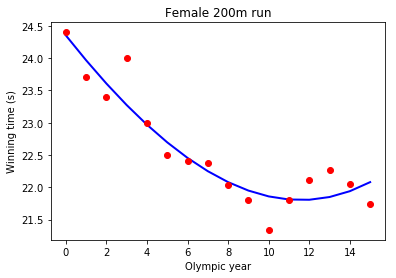

In [80]:
#plot 3rd order polynomial 
%matplotlib inline
plt.plot(x_test3,f_test3,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.title('Female 200m run')
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

In [81]:
#calculating the loss 
loss_Poly_3 = (t - np.dot(X__poly_3, w3))
loss_t = loss_Poly_3.T

#AVERGARE Polynomial Loss
avg_loss_polynomial = (np.dot(loss_t, loss_Poly_3))/len(x)
print('Average loss of 3rd order polynomial equation:\n',avg_loss_polynomial)

Average loss of 3rd order polynomial equation:
 0.08717867111925753


# Question 4

In [82]:
x_vec_5 = np.array(x)

In [83]:
#calculating year with 5th order polynomial 
maxorder = 5
X_Poly_5 = np.ones_like(x_vec_5)
for i in range(1,maxorder+1):
    X_Poly_5 = np.column_stack((X_Poly_5,np.power(x_vec_5,i)))
print(X_Poly_5)

[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00]
 [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01]
 [1.00000e+00 3.00000e+00 9.00000e+00 2.70000e+01 8.10000e+01 2.43000e+02]
 [1.00000e+00 4.00000e+00 1.60000e+01 6.40000e+01 2.56000e+02 1.02400e+03]
 [1.00000e+00 5.00000e+00 2.50000e+01 1.25000e+02 6.25000e+02 3.12500e+03]
 [1.00000e+00 6.00000e+00 3.60000e+01 2.16000e+02 1.29600e+03 7.77600e+03]
 [1.00000e+00 7.00000e+00 4.90000e+01 3.43000e+02 2.40100e+03 1.68070e+04]
 [1.00000e+00 8.00000e+00 6.40000e+01 5.12000e+02 4.09600e+03 3.27680e+04]
 [1.00000e+00 9.00000e+00 8.10000e+01 7.29000e+02 6.56100e+03 5.90490e+04]
 [1.00000e+00 1.00000e+01 1.00000e+02 1.00000e+03 1.00000e+04 1.00000e+05]
 [1.00000e+00 1.10000e+01 1.21000e+02 1.33100e+03 1.46410e+04 1.61051e+05]
 [1.00000e+00 1.20000e+01 1.44000e+02 1.72800e+03 2.07360e+04 2.48832e+05]
 [1.00000e+00 1.30000e+01

In [85]:
#calculating w0 , w1, w3, w4, w5 
w_5 = np.dot(np.linalg.inv(np.dot(X_Poly_5.T,X_Poly_5)),np.dot(X_Poly_5.T,t))
print(w_5)

[ 2.43230728e+01 -6.35049893e-01  2.14488469e-01 -4.71367687e-02
  4.16775820e-03 -1.22816941e-04]


In [86]:
#Creating test set 
x_test_5 = np.linspace(0,15,x.size)[:,None]
X_test_5 = np.ones_like(x_test_5)
for i in range(1,maxorder+1):
    X_test_5 = np.hstack((X_test_5,x_test_5**i))
# X_test = np.hstack((X_test,np.sin(x_test)))
f_test_5 = np.dot(X_test_5,w_5)

print(f_test_5)

[24.32307276 23.85941951 23.59658669 23.38337045 23.13911705 22.83898488
 22.49920636 22.16234997 21.88258216 21.71092939 21.68054001 21.7919463
 21.99832639 22.19076625 22.18352167 21.69928018]


Text(0,0.5,'Winning time (s)')

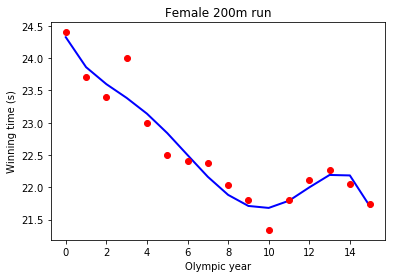

In [88]:
#plot 
%matplotlib inline
plt.plot(x_test_5,f_test_5,'b-',linewidth=2)
plt.plot(x,t,'ro')
plt.title('Female 200m run')
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

In [89]:
#calculating the loss 
loss_5 = (t - np.dot(X_Poly_5, w_5))
loss_t = loss_5.T
avg_loss_polynomial_5 = (np.dot(loss_t, loss_5))/len(x)
print('Average loss of polynomial equation:\n',avg_loss_polynomial_5)

Average loss of polynomial equation:
 0.05161528042391057


# Question 5

Text(0,0.5,'Winning time (s)')

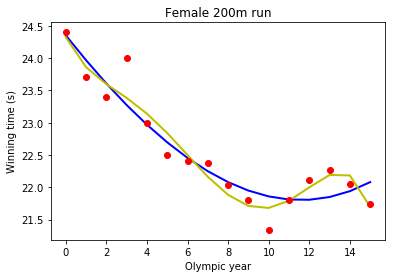

In [94]:
# 3rd order polynomial
plt.plot(x_test3,f_test3,'b-',linewidth=2)

# 5th order polynomial
plt.plot(x_test_5,f_test_5,'y-',linewidth=2)
plt.plot(x,t,'ro')
plt.title('Female 200m run')
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

# Question 6

In [95]:
# Removing w0 from w vector
w_complex = w_5[1:]
w_complex

array([-6.35049893e-01,  2.14488469e-01, -4.71367687e-02,  4.16775820e-03,
       -1.22816941e-04])

In [96]:
# Calculating Regularization loss
lambda_1 = 0.000000000000000001
loss_reg = avg_loss_polynomial_5 + lambda_1 * np.dot(w_complex.T, w_complex)

#print R_loss
loss_reg

0.05161528042391057

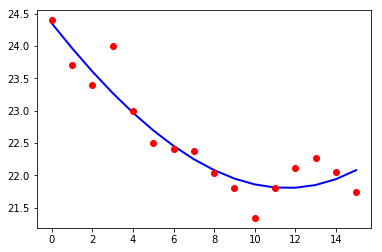

In [99]:
plt.plot(x_test3,f_test3,'b-',linewidth=2)
plt.plot(x,t,'ro')

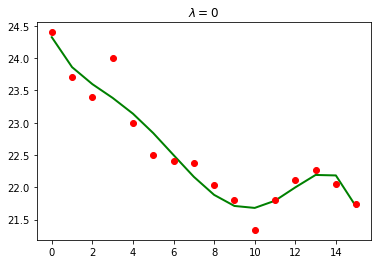

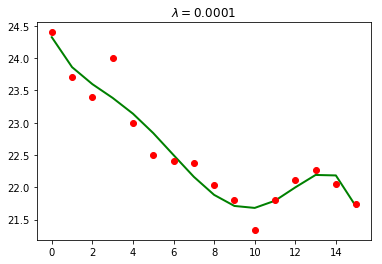

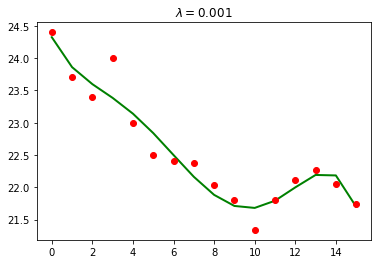

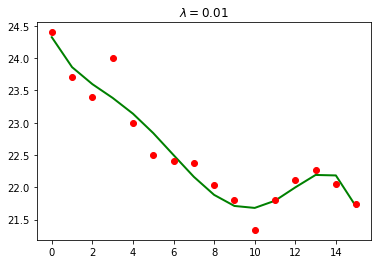

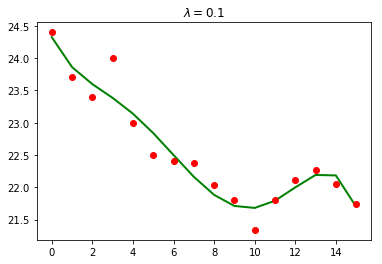

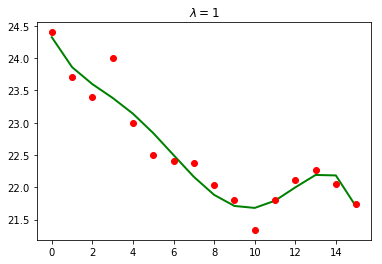

In [104]:
x = np.array(x)
for lamb in [0,0.0001,0.001,0.01,0.1,1]:
    W = np.linalg.solve(np.dot(X_Poly_5.T,X_Poly_5) + x.size*lamb*np.identity(maxorder+1),np.dot(X_Poly_5.T,t))
    f_test = np.dot(X_test_5,W)
    plt.figure()
    plt.plot(x_test_5,f_test_5,'g-',linewidth=2)
    plt.plot(x,t,'ro')
    title = '$\lambda=$%g'%lamb
    plt.title(title)